In [1]:
import helpers.images
import pandas as pd

In [2]:
im_paeth = helpers.images.get_paeth_images('train')
im_raw = helpers.images.get_images('train')

100%|██████████| 50000/50000 [01:26<00:00, 578.99it/s]


In [3]:
target = pd.read_csv('precomputed/train.csv')['PNG Size']

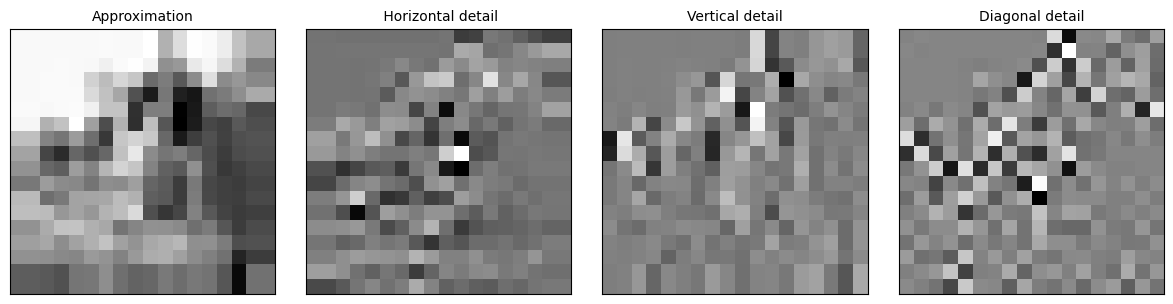

In [4]:
# Wavelet transform
import numpy as np
import matplotlib.pyplot as plt

import pywt

original = im_raw[0]

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffsR = pywt.dwt2(original[:,:,0], 'bior1.3')
coeffsg = pywt.dwt2(original[:,:,1], 'bior1.3')
coeffsB = pywt.dwt2(original[:,:,2], 'bior1.3')
LLR, (LHR, HLR, HHR) = coeffsR
LLG, (LHG, HLG, HHG) = coeffsR
LLB, (LHB, HLB, HHB) = coeffsR



fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LLR, LHR, HLR, HHR]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


In [5]:
LLR.shape, LHR.shape, HLR.shape, HHR.shape,

((18, 18), (18, 18), (18, 18), (18, 18))

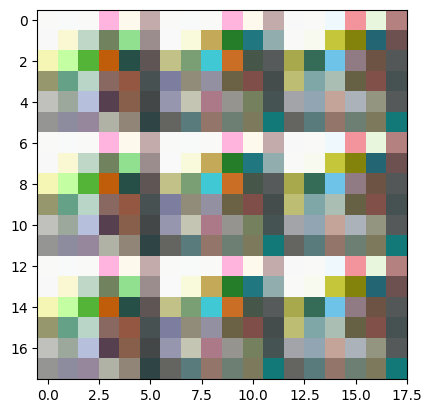

In [6]:
duduLL = np.array([LLR, LLG, LLB]).reshape((18,18, 3))
duduLL /= duduLL.max()
plt.imshow(duduLL)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

In [8]:
images = [np.zeros((2, 2)), np.zeros((2, 2)),
          np.zeros((3, 3)), np.zeros((3, 3)),
          np.zeros((2, 2))]

C:\Users\cleme\AppData\Local\Temp\ipykernel_28040\4155195662.py:8: FutureWarning: `random_state` is a deprecated argument name for `draw_haar_like_feature`. It will be removed in version 0.23. Please use `rng` instead.
  haar_feature = draw_haar_like_feature(img, 0, 0,


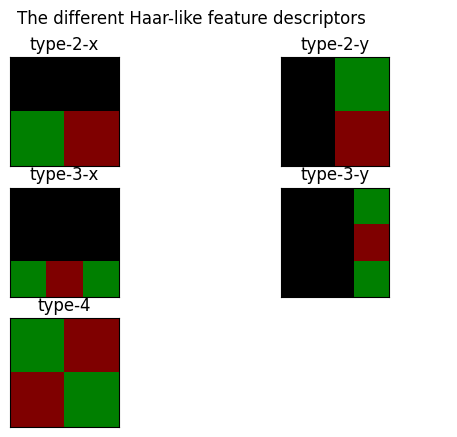

In [9]:
feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

fig, axs = plt.subplots(3, 2)
for ax, img, feat_t in zip(np.ravel(axs), images, feature_types):
    coord, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0,
                                          img.shape[0],
                                          img.shape[1],
                                          coord,
                                          max_n_features=1,
                                          random_state=0)
    ax.imshow(haar_feature)
    ax.set_title(feat_t)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The different Haar-like feature descriptors')
plt.axis('off')
plt.show()

In [10]:
haar_like_feature_coord(32, 32, 'type-2-x')

(array([list([[(0, 0), (0, 0)], [(0, 1), (0, 1)]]),
        list([[(0, 0), (0, 1)], [(0, 2), (0, 3)]]),
        list([[(0, 0), (0, 2)], [(0, 3), (0, 5)]]), ...,
        list([[(31, 28), (31, 29)], [(31, 30), (31, 31)]]),
        list([[(31, 29), (31, 29)], [(31, 30), (31, 30)]]),
        list([[(31, 30), (31, 30)], [(31, 31), (31, 31)]])], dtype=object),
 array(['type-2-x', 'type-2-x', 'type-2-x', ..., 'type-2-x', 'type-2-x',
        'type-2-x'], dtype=object))

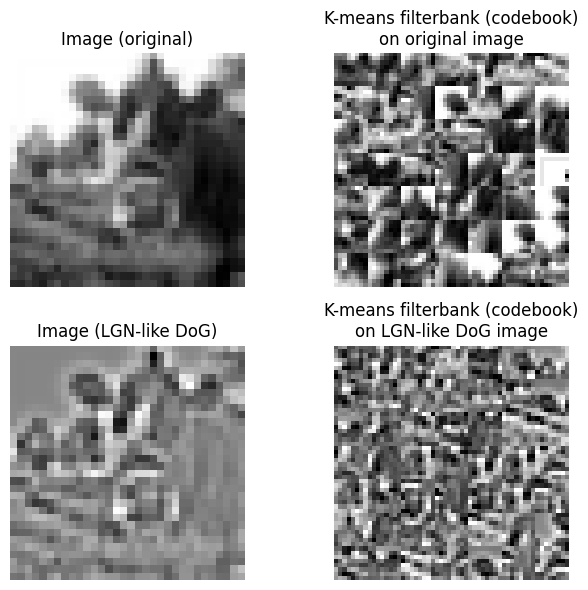

In [11]:
from scipy.cluster.vq import kmeans2
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage.util.shape import view_as_windows
from skimage.util import montage

patch_shape = 8, 8
n_filters = 49

astro = color.rgb2gray(data.astronaut())
astro = im_raw[0][:,:,2].astype(float) / 255

# -- filterbank1 on original image
patches1 = view_as_windows(astro, patch_shape)
patches1 = patches1.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb1, _ = kmeans2(patches1, n_filters, minit='points')
fb1 = fb1.reshape((-1,) + patch_shape)
fb1_montage = montage(fb1, rescale_intensity=True)

# -- filterbank2 LGN-like image
astro_dog = ndi.gaussian_filter(astro, .5) - ndi.gaussian_filter(astro, 1)
patches2 = view_as_windows(astro_dog, patch_shape)
patches2 = patches2.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb2, _ = kmeans2(patches2, n_filters, minit='points')
fb2 = fb2.reshape((-1,) + patch_shape)
fb2_montage = montage(fb2, rescale_intensity=True)

# -- plotting
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax = axes.ravel()

ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title("Image (original)")

ax[1].imshow(fb1_montage, cmap=plt.cm.gray)
ax[1].set_title("K-means filterbank (codebook)\non original image")

ax[2].imshow(astro_dog, cmap=plt.cm.gray)
ax[2].set_title("Image (LGN-like DoG)")

ax[3].imshow(fb2_montage, cmap=plt.cm.gray)
ax[3].set_title("K-means filterbank (codebook)\non LGN-like DoG image")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()
plt.show()

In [12]:
import scipy as sp
import helpers.measures

In [13]:
from scipy import ndimage as ndi

#paeth_gaussian_filt = [helpers.measures.l0_norm(
#    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)
#) for im in im_raw]
#
#raw_gaussian_filt = [helpers.measures.l0_norm(
#    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)
#) for im in im_raw]

In [14]:
def get_greyopening_l0(im):
    TOT = 0
    for chan in range(3):
        im0 = im[:,:,chan]
        im0_grey_opening = sp.ndimage.grey_opening(im0, size=(2,2))
        diff = np.abs(im0 - im0_grey_opening)
        TOT += helpers.measures.l0_norm(diff)
    return TOT

In [15]:
def get_greyopening_l1(im):
    TOT = 0
    for chan in range(3):
        im0 = im[:,:,chan]
        im0_grey_opening = sp.ndimage.grey_opening(im0, size=(2,2))
        diff = np.abs(im0 - im0_grey_opening)
        TOT += helpers.measures.l1_norm(diff)
    return TOT
def get_greyopening_l2(im):
    TOT = 0
    for chan in range(3):
        im0 = im[:,:,chan]
        im0_grey_opening = sp.ndimage.grey_opening(im0, size=(2,2))
        diff = np.abs(im0 - im0_grey_opening)
        TOT += helpers.measures.lp_norm(diff, 2)
    return TOT

In [16]:
def get_greyopening_ent(im):
    TOT = 0
    for chan in range(3):
        im0 = im[:,:,chan]
        im0_grey_opening = sp.ndimage.grey_opening(im0, size=(2,2))
        TOT += helpers.measures.shannon_entropy(im0 - im0_grey_opening)/3
    return TOT

In [17]:
sp.ndimage.grey_opening(im_raw[0][:,:,0], size=(2,2)).shape
get_greyopening_ent(im_raw[0])

1.7260697676709982

In [18]:
im0 = im_raw[0][:,:,0]
im0_grey_opening = sp.ndimage.grey_opening(im0, size=(2,2))


In [19]:
import tqdm

In [20]:
raw_greyopening = [get_greyopening_l0(im) for im in tqdm.tqdm(im_raw)]
paeth_greyopening = [get_greyopening_l0(im) for im in tqdm.tqdm(im_paeth)]

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:08<00:00, 5942.11it/s]


In [21]:
df = pd.DataFrame()
df['PNG Size'] = target
df['Raw Grey opening'] = raw_greyopening
df['Paeth Grey opening'] = paeth_greyopening
df.corr()

,PNG Size,Raw Grey opening,Paeth Grey opening
PNG Size,1.000000,-0.767254,-0.360996
Raw Grey opening,-0.767254,1.000000,0.392783
Paeth Grey opening,-0.360996,0.392783,1.000000


In [22]:
import plotly.express as px

In [68]:
df_train = pd.read_csv('precomputed/train.csv')
df_test = pd.read_csv('precomputed/test.csv')

train_im_paeth = helpers.images.get_paeth_images('train')
train_im_raw = helpers.images.get_images('train')

test_im_paeth = helpers.images.get_paeth_images('test')
test_im_raw = helpers.images.get_images('test')

train_raw_greyopening_l0 = [get_greyopening_l0(im) for im in tqdm.tqdm(train_im_raw)]
train_paeth_greyopening_l0 = [get_greyopening_l0(im) for im in tqdm.tqdm(train_im_paeth)]

test_raw_greyopening_l0 = [get_greyopening_l0(im) for im in tqdm.tqdm(test_im_raw)]
test_paeth_greyopening_l0 = [get_greyopening_l0(im) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Grey Opening L0'] = train_raw_greyopening_l0
df_train['Paeth Grey Opening L0'] = train_paeth_greyopening_l0

df_test['Raw Grey Opening L0'] = test_raw_greyopening_l0
df_test['Paeth Grey Opening L0'] = test_paeth_greyopening_l0

train_raw_greyopening_l1 = [get_greyopening_l1(im) for im in tqdm.tqdm(train_im_raw)]
train_paeth_greyopening_l1 = [get_greyopening_l1(im) for im in tqdm.tqdm(train_im_paeth)]

test_raw_greyopening_l1 = [get_greyopening_l1(im) for im in tqdm.tqdm(test_im_raw)]
test_paeth_greyopening_l1 = [get_greyopening_l1(im) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Grey Opening L1'] = train_raw_greyopening_l1
df_train['Paeth Grey Opening L1'] = train_paeth_greyopening_l1

df_test['Raw Grey Opening L1'] = test_raw_greyopening_l1
df_test['Paeth Grey Opening L1'] = test_paeth_greyopening_l1

train_raw_greyopening_l2 = [get_greyopening_l2(im) for im in tqdm.tqdm(train_im_raw)]
train_paeth_greyopening_l2 = [get_greyopening_l2(im) for im in tqdm.tqdm(train_im_paeth)]

test_raw_greyopening_l2 = [get_greyopening_l2(im) for im in tqdm.tqdm(test_im_raw)]
test_paeth_greyopening_l2 = [get_greyopening_l2(im) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Grey Opening L2'] = train_raw_greyopening_l2
df_train['Paeth Grey Opening L2'] = train_paeth_greyopening_l2

df_test['Raw Grey Opening L2'] = test_raw_greyopening_l2
df_test['Paeth Grey Opening L2'] = test_paeth_greyopening_l2

train_raw_greyopening_ent = [get_greyopening_ent(im) for im in tqdm.tqdm(train_im_raw)]
train_paeth_greyopening_ent = [get_greyopening_ent(im) for im in tqdm.tqdm(train_im_paeth)]

test_raw_greyopening_ent = [get_greyopening_ent(im) for im in tqdm.tqdm(test_im_raw)]
test_paeth_greyopening_ent = [get_greyopening_ent(im) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Grey Opening H'] = train_raw_greyopening_ent
df_train['Paeth Grey Opening H'] = train_paeth_greyopening_ent

df_test['Raw Grey Opening H'] = test_raw_greyopening_ent
df_test['Paeth Grey Opening H'] = test_paeth_greyopening_ent

print('--- Gaussian Filters dings ---')

train_raw_gaussfilt_l0 = [helpers.measures.l0_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(train_im_raw)]
train_paeth_gaussfilt_l0 = [helpers.measures.l0_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(train_im_paeth)]

test_raw_gaussfilt_l0 = [helpers.measures.l0_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(test_im_raw)]
test_paeth_gaussfilt_l0 = [helpers.measures.l0_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Gaussian Filter L0'] = train_raw_gaussfilt_l0
df_train['Paeth Gaussian Filter L0'] = train_paeth_gaussfilt_l0

df_test['Raw Gaussian Filter L0'] = test_raw_gaussfilt_l0
df_test['Paeth Gaussian Filter L0'] = test_paeth_gaussfilt_l0

train_raw_gaussfilt_l1 = [helpers.measures.l1_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(train_im_raw)]
train_paeth_gaussfilt_l1 = [helpers.measures.l1_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(train_im_paeth)]

test_raw_gaussfilt_l1 = [helpers.measures.l1_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(test_im_raw)]
test_paeth_gaussfilt_l1 = [helpers.measures.l1_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1)) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Gaussian Filter L1'] = train_raw_gaussfilt_l1
df_train['Paeth Gaussian Filter L1'] = train_paeth_gaussfilt_l1

df_test['Raw Gaussian Filter L1'] = test_raw_gaussfilt_l1
df_test['Paeth Gaussian Filter L1'] = test_paeth_gaussfilt_l1


train_raw_gaussfilt_l2 = [helpers.measures.lp_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1), 2) for im in tqdm.tqdm(train_im_raw)]
train_paeth_gaussfilt_l2 = [helpers.measures.lp_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1), 2) for im in tqdm.tqdm(train_im_paeth)]

test_raw_gaussfilt_l2 = [helpers.measures.lp_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1), 2) for im in tqdm.tqdm(test_im_raw)]
test_paeth_gaussfilt_l2 = [helpers.measures.lp_norm(
    ndi.gaussian_filter(im, .5) - ndi.gaussian_filter(im, 1), 2) for im in tqdm.tqdm(test_im_paeth)]

df_train['Raw Gaussian Filter L2'] = train_raw_gaussfilt_l2
df_train['Paeth Gaussian Filter L2'] = train_paeth_gaussfilt_l2

df_test['Raw Gaussian Filter L2'] = test_raw_gaussfilt_l2
df_test['Paeth Gaussian Filter L2'] = test_paeth_gaussfilt_l2



100%|██████████| 10000/10000 [00:13<00:00, 723.00it/s]


--- Gaussian Filters dings ---


100%|██████████| 10000/10000 [00:04<00:00, 2480.38it/s]


In [69]:
y_train = df_train['PNG Size']
X_train = df_train.drop('PNG Size', axis=1)
y_test = df_test['PNG Size']
X_test = df_test.drop('PNG Size', axis=1)

In [70]:
df_train.corr()

,PNG Size,$Hopkins$,$H_S$,$H_{S'}$,$\ell^0$,$\ell^1$,$\ell^2$ / $\ell^1$,$log$,$\kappa_4$,$H_G$,...,Raw Grey Opening L2,Paeth Grey Opening L2,Raw Grey Opening H,Paeth Grey Opening H,Raw Gaussian Filter L0,Paeth Gaussian Filter L0,Raw Gaussian Filter L1,Paeth Gaussian Filter L1,Raw Gaussian Filter L2,Paeth Gaussian Filter L2
PNG Size,1.000000,-0.674521,0.677408,0.210710,-0.419774,-0.158290,0.084406,0.446328,-0.443384,0.417618,...,0.847220,0.361936,0.848399,0.461972,-0.596916,-0.497553,0.465232,0.319669,0.497429,0.297766
$Hopkins$,-0.674521,1.000000,-0.317563,-0.032624,0.061019,0.020626,0.065572,-0.080538,0.136234,-0.061382,...,-0.626427,-0.099332,-0.568490,-0.144235,0.266683,0.286822,-0.157417,-0.173236,-0.392853,-0.353652
$H_S$,0.677408,-0.317563,1.000000,0.067308,-0.704977,0.012634,-0.057041,0.748220,-0.731959,0.706040,...,0.446628,0.379271,0.482893,0.422832,-0.767741,-0.555394,0.547484,0.246293,0.497732,0.177181
$H_{S'}$,0.210710,-0.032624,0.067308,1.000000,-0.063052,-0.989755,0.841091,0.090490,-0.121807,0.042712,...,0.291610,0.187992,0.285869,0.222397,-0.110555,0.018156,0.468666,0.543788,0.093526,-0.037991
$\ell^0$,-0.419774,0.061019,-0.704977,-0.063052,1.000000,-0.034785,-0.120847,-0.917971,0.721743,-0.999716,...,-0.273874,-0.317332,-0.371437,-0.385568,0.639077,0.310975,-0.580268,-0.062543,-0.172231,0.232491
$\ell^1$,-0.158290,0.020626,0.012634,-0.989755,-0.034785,1.000000,-0.859851,0.010378,0.031358,0.056212,...,-0.246595,-0.139890,-0.228964,-0.170030,0.029751,-0.062958,-0.410514,-0.529597,-0.080901,0.005244
$\ell^2$ / $\ell^1$,0.084406,0.065572,-0.057041,0.841091,-0.120847,-0.859851,1.000000,0.127798,-0.099416,0.100013,...,0.171168,0.101738,0.173488,0.146753,0.006192,0.168324,0.406862,0.391400,-0.039186,-0.175314
$log$,0.446328,-0.080538,0.748220,0.090490,-0.917971,0.010378,0.127798,1.000000,-0.851799,0.919206,...,0.293326,0.342414,0.390644,0.409885,-0.669103,-0.330722,0.571616,0.138003,0.177745,-0.225170
$\kappa_4$,-0.443384,0.136234,-0.731959,-0.121807,0.721743,0.031358,-0.099416,-0.851799,1.000000,-0.722914,...,-0.294378,-0.306609,-0.372577,-0.356763,0.650992,0.352822,-0.498261,-0.209083,-0.212320,0.141912
$H_G$,0.417618,-0.061382,0.706040,0.042712,-0.999716,0.056212,0.100013,0.919206,-0.722914,1.000000,...,0.270409,0.315714,0.368528,0.383136,-0.640020,-0.314417,0.571547,0.052659,0.170115,-0.232527


In [71]:
from sklearn.linear_model import Lasso
for alpha in [0.125, 0.25, 0.5, 1, 2, 4, 8, 100, 250, 1000]:
    model = Lasso(alpha=alpha, max_iter=1000)
    model.fit(X_train, y_train)
    s = model.score(X_test, y_test)
    print(f"LAMBDA = {alpha} | Score = {s}")

c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+08, tolerance: 5.926e+05



LAMBDA = 0.125 | Score = 0.9050618805418468


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.215e+08, tolerance: 5.926e+05



LAMBDA = 0.25 | Score = 0.9023980663685204


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+08, tolerance: 5.926e+05



LAMBDA = 0.5 | Score = 0.8943782227476551


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.834e+08, tolerance: 5.926e+05



LAMBDA = 1 | Score = 0.8864871971926052


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e+08, tolerance: 5.926e+05



LAMBDA = 2 | Score = 0.8620613790871873


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.073e+08, tolerance: 5.926e+05



LAMBDA = 4 | Score = 0.8613622682361796


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+08, tolerance: 5.926e+05



LAMBDA = 8 | Score = 0.8613396408024879


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.551e+08, tolerance: 5.926e+05



LAMBDA = 100 | Score = 0.8596816290917643


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e+08, tolerance: 5.926e+05



LAMBDA = 250 | Score = 0.8546797564390071
LAMBDA = 1000 | Score = 0.8302723641915665


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.079e+08, tolerance: 5.926e+05



In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

lasso05 = Lasso(0.5)
scaler = StandardScaler()
lasso05.fit(pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns), y_train)
lasso05.score(scaler.transform(X_test), y_test)

SelectFromModel(lasso05).fit(pd.DataFrame(scaler.transform(X_train), columns=X_train.columns), y_train).get_feature_names_out()

c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



array(['$Hopkins$', '$H_S$', '$\\ell^2$ / $\\ell^1$', '$\\kappa_4$',
       '$Gini$', '$\\ell_{0.005}^0$', '$\\ell^{2}$', '$-\\ell^{-0.5}_-$',
       '$Card$', '$Card_{raw}$', '$Card_{raw}^{mono}$',
       'Raw Grey Opening L0', 'Paeth Grey Opening L0',
       'Raw Grey Opening L1', 'Paeth Grey Opening L1',
       'Raw Grey Opening L2', 'Paeth Grey Opening L2',
       'Raw Grey Opening H', 'Paeth Grey Opening H',
       'Raw Gaussian Filter L0', 'Paeth Gaussian Filter L0',
       'Raw Gaussian Filter L1', 'Raw Gaussian Filter L2'], dtype=object)

In [73]:

coeff = pd.DataFrame()
coeff['Name'] =  lasso05.feature_names_in_
coeff['coeff'] = lasso05.coef_
coeff.sort_values('coeff')

,Name,coeff
0,$Hopkins$,-90.274453
21,Raw Grey Opening L1,-72.361474
24,Paeth Grey Opening L2,-43.883064
28,Paeth Gaussian Filter L0,-26.272073
10,$Gini$,-24.319566
13,$\ell^{2}$,-18.849787
7,$\kappa_4$,-8.404073
31,Raw Gaussian Filter L2,-7.718162
27,Raw Gaussian Filter L0,-4.803436
29,Raw Gaussian Filter L1,-3.848095


In [74]:
pd.DataFrame(X_train)

,$Hopkins$,$H_S$,$H_{S'}$,$\ell^0$,$\ell^1$,$\ell^2$ / $\ell^1$,$log$,$\kappa_4$,$H_G$,$Hoyer$,...,Raw Grey Opening L2,Paeth Grey Opening L2,Raw Grey Opening H,Paeth Grey Opening H,Raw Gaussian Filter L0,Paeth Gaussian Filter L0,Raw Gaussian Filter L1,Paeth Gaussian Filter L1,Raw Gaussian Filter L2,Paeth Gaussian Filter L2
0,0.720609,5.234528,-2982.0,238.0,363264.0,0.001480,11364.0,0.000002,-83142.517314,-11.393041,...,459.019480,103.394578,1.726070,0.903660,201.0,59.0,343056.0,393328.0,483.123173,523.343100
1,0.737536,3.411710,-2512.0,1261.0,285542.0,0.001361,6666.0,0.000005,-562849.644926,-12.481037,...,261.468779,22.539268,0.936292,0.369631,582.0,248.0,225960.0,442134.0,370.437579,506.772138
2,0.788982,5.239945,-4616.0,0.0,517999.0,0.001113,12852.0,0.000002,30783.838634,-15.492304,...,291.304692,12.916956,0.959437,0.367741,96.0,106.0,333435.0,332613.0,432.891441,433.738400
3,0.730957,5.282649,-4336.0,12.0,482547.0,0.001172,12660.0,0.000002,23367.587886,-14.663900,...,301.361873,151.828730,1.257264,1.715766,56.0,54.0,354316.0,355076.0,496.201572,499.135252
4,0.695169,5.139883,-2310.0,0.0,313581.0,0.001826,12564.0,0.000002,27658.079731,-9.043470,...,454.374471,196.620444,1.792328,2.305607,89.0,100.0,389347.0,387268.0,451.037692,449.052335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.740790,5.389288,-2682.0,2.0,341446.0,0.001721,12948.0,0.000002,26645.666727,-9.654917,...,414.132602,131.515601,1.683169,1.718907,104.0,96.0,393456.0,393472.0,464.702055,465.568470
49996,0.699921,5.223213,-2904.0,1.0,371297.0,0.001533,12468.0,0.000002,28198.851434,-10.968072,...,563.683529,141.739622,2.158693,1.384029,99.0,115.0,376474.0,376079.0,461.105194,461.998918
49997,0.774910,5.224931,-2070.0,0.0,283571.0,0.002053,12852.0,0.000002,26537.241976,-7.930891,...,451.640648,66.731247,1.850937,0.868377,85.0,83.0,434704.0,434973.0,478.069033,475.658491
49998,0.783510,4.831668,-2134.0,0.0,301228.0,0.001818,12108.0,0.000002,27678.085440,-9.086374,...,392.960010,57.860207,1.761475,0.785493,48.0,51.0,328523.0,328669.0,498.909811,500.536712


In [75]:
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [5],
            "n_estimators": [2250],
            "learning_rate": [0.0375]}

# try out every combination of the above values
regressor=xgb.XGBRegressor(eval_metric='rmse', missing=np.inf)

X_train = X_train.ffill()#pd.DataFrame(np.nan_to_num(X_train))
X_test = X_test.ffill()#pd.DataFrame(np.nan_to_num(X_test))

X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test =  pd.DataFrame(StandardScaler().fit_transform(X_test))
X_train.columns = df_train.columns[1:]
X_test.columns = df_train.columns[1:]
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print(search.best_params_)
model=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                    n_estimators  = search.best_params_["n_estimators"],
                    max_depth     = search.best_params_["max_depth"],
                    #eval_metric='rmsle',
                    missing=np.inf) 
#model = xgb.XGBRegressor(eval_metric='rmsle', missing=np.inf)
model.fit(pd.DataFrame(X_train), y_train)
pred = model.predict(X_test)
fig = px.scatter(
    x=pred, y=y_test, 
    trendline='ols', trendline_color_override='red',
    labels={
                "x": "Predicted",
                "y": "PNG Size",
            },
    title=f'R² = {model.score(pd.DataFrame(X_test), y_test):_.3f}\t\t|\t\tMAE% = {100*mean_absolute_percentage_error(pred, y_test):_.3f}%',
)
fig.show()


{'learning_rate': 0.0375, 'max_depth': 5, 'n_estimators': 2250}


In [76]:
df_train.columns[1:]

Index(['$Hopkins$', '$H_S$', '$H_{S'}$', '$\ell^0$', '$\ell^1$',
       '$\ell^2$ / $\ell^1$', '$log$', '$\kappa_4$', '$H_G$', '$Hoyer$',
       '$Gini$', '$tanh_{0.5,2}$', '$\ell_{0.005}^0$', '$\ell^{2}$',
       '$-\ell^{-0.5}_-$', '$Gini_{raw}$', '$Card$', '$Card_{raw}$',
       '$Card_{raw}^{mono}$', 'Raw Grey Opening L0', 'Paeth Grey Opening L0',
       'Raw Grey Opening L1', 'Paeth Grey Opening L1', 'Raw Grey Opening L2',
       'Paeth Grey Opening L2', 'Raw Grey Opening H', 'Paeth Grey Opening H',
       'Raw Gaussian Filter L0', 'Paeth Gaussian Filter L0',
       'Raw Gaussian Filter L1', 'Paeth Gaussian Filter L1',
       'Raw Gaussian Filter L2', 'Paeth Gaussian Filter L2'],
      dtype='object')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

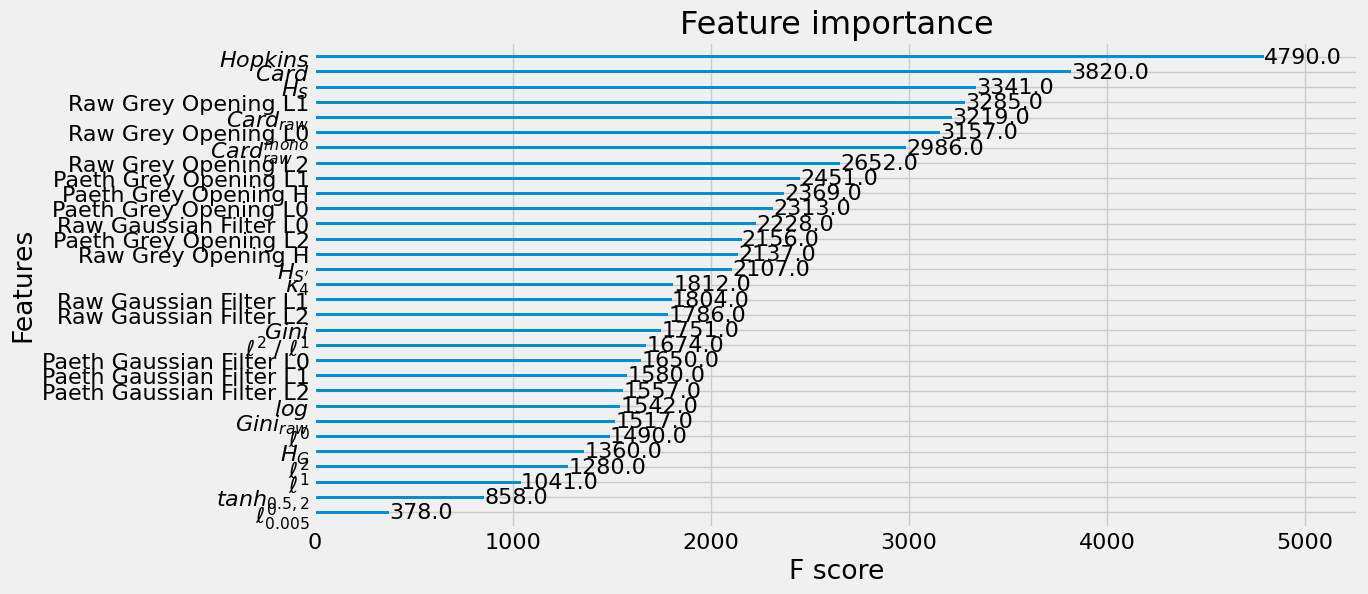

In [77]:
from xgboost import plot_importance

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, ax=ax)

In [78]:
fig.show()

C:\Users\cleme\AppData\Local\Temp\ipykernel_28040\89474557.py:1: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [79]:
(pred - y_test).describe()

count    10000.000000
mean        -6.353724
std         92.643291
min       -385.589600
25%        -62.523560
50%        -13.001526
75%         40.607086
max        696.443115
Name: PNG Size, dtype: float64

In [80]:
px.histogram(((pred - y_test)/y_test))

In [81]:
error_distrib = ((pred - y_test)/y_test)
px.violin(error_distrib)

In [82]:
error_distrib.describe()

count    10000.000000
mean        -0.001034
std          0.039978
min         -0.163222
25%         -0.023245
50%         -0.004892
75%          0.015429
max          0.401408
Name: PNG Size, dtype: float64

In [83]:
dfdfdf = pd.DataFrame()
dfdfdf['PNG Size'] = y_train
dfdfdf['L0 Grey Raw'] = [get_greyopening_l0(im) for im in tqdm.tqdm(train_im_raw)]
dfdfdf['L1 Grey Raw'] = [get_greyopening_l1(im) for im in tqdm.tqdm(train_im_raw)]
dfdfdf['L2 Grey Raw'] = [get_greyopening_l2(im) for im in tqdm.tqdm(train_im_raw)]
dfdfdf['L0 Grey Paeth'] = [get_greyopening_l0(im) for im in tqdm.tqdm(train_im_paeth)]
dfdfdf['L1 Grey Paeth'] = [get_greyopening_l1(im) for im in tqdm.tqdm(train_im_paeth)]
dfdfdf['L2 Grey Paeth'] = [get_greyopening_l2(im) for im in tqdm.tqdm(train_im_paeth)]
dfdfdf.corr()

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:10<00:00, 4939.64it/s]


,PNG Size,L0 Grey Raw,L1 Grey Raw,L2 Grey Raw,L0 Grey Paeth,L1 Grey Paeth,L2 Grey Paeth
PNG Size,1.000000,-0.767254,0.719241,0.847220,-0.360996,0.048724,0.361936
L0 Grey Raw,-0.767254,1.000000,-0.690926,-0.854632,0.392783,0.014006,-0.345730
L1 Grey Raw,0.719241,-0.690926,1.000000,0.881322,-0.200968,0.073353,0.233899
L2 Grey Raw,0.847220,-0.854632,0.881322,1.000000,-0.293673,0.036103,0.315792
L0 Grey Paeth,-0.360996,0.392783,-0.200968,-0.293673,1.000000,-0.388520,-0.848967
L1 Grey Paeth,0.048724,0.014006,0.073353,0.036103,-0.388520,1.000000,0.518563
L2 Grey Paeth,0.361936,-0.345730,0.233899,0.315792,-0.848967,0.518563,1.000000


In [84]:
cor = df_train.corr().abs()
fig = px.imshow(cor.fillna(0)
                .sort_values('PNG Size', ascending=False, axis=0)
                .sort_values('PNG Size', ascending=False, axis=1), color_continuous_scale='blues')
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
fig.show()

In [85]:
get_greyopening_l0(im_raw[0]), get_greyopening_l0(im_paeth[0])

(2088.0, 235.0)

In [86]:
im0_R = im_raw[0][:,:,0]
im0_R_grey_opening = sp.ndimage.grey_opening(im0_R, size=(2,2))
diff = np.abs(im0_R - im0_R_grey_opening)
diff.sum()

4283

In [87]:
pd.Series(diff.flatten()).describe()

count    1024.000000
mean        4.182617
std        10.051327
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        79.000000
dtype: float64

In [88]:
im0_R_grey_opening

array([[255, 255, 255, ..., 195, 195, 182],
       [255, 254, 254, ..., 170, 161, 146],
       [255, 254, 255, ..., 170, 161, 121],
       ...,
       [148, 142, 140, ...,  30,  65,  65],
       [122, 120, 120, ...,  22,  97,  97],
       [ 87,  88,  88, ...,  22,  97,  97]], dtype=uint8)

In [89]:
im0_R

array([[255, 255, 255, ..., 195, 212, 182],
       [255, 254, 254, ..., 170, 161, 146],
       [255, 254, 255, ..., 189, 166, 121],
       ...,
       [148, 142, 140, ...,  30,  65,  76],
       [122, 120, 126, ...,  22,  97, 141],
       [ 87,  88, 101, ...,  34, 105, 138]], dtype=uint8)